# importing library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import os
import cv2
from tensorflow.python.keras.models import Sequential,load_model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.metrics import BinaryAccuracy
import warnings
warnings.filterwarnings("ignore")

# all file location

In [4]:
main_path = "C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA"
model_path = "C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\"
#feature location

#LSB location

for_lsb = main_path + '\\lsb_dataset'
train_path =os.path.join(for_lsb,"train_histrogram_features.pickle")
test_path = os.path.join(for_lsb,"test_histrogram_features.pickle")
validation_path = os.path.join(for_lsb,"valid_histrogram_features.pickle")
interset_set_path = os.path.join(for_lsb,"INTERNET_SET.pickle")
small_set_path = os.path.join(for_lsb,"LSB_SMALL_SET.pickle")
model_location_path = os.path.join(model_path,"mlp_model_LSB_11ep_sigmoid.h5")
model_location_history = os.path.join(model_path,"mlp_model_11epHISTORY.pickle")



#Random LSB location

for_ran_lsb = main_path + '\\lsb_random_dataset'
train_lsbRan_path =os.path.join(for_ran_lsb,"LSBRANDOM_train_histrogram_features.pickle")
test_lsbRan_path = os.path.join(for_ran_lsb,"LSBRANDOM_test_histrogram_features.pickle")
validation_lsbRan_path = os.path.join(for_ran_lsb,"LSBRANDOM_valid_histrogram_features.pickle")
interset_lsbRan_setpath = os.path.join(for_ran_lsb,"LSBRAN_INTERNET_SET.pickle")
small_set_lsb_random_path = os.path.join(for_ran_lsb,"LSB_RAN_SMALL20%_SET.pickle")
model_location_lsb_random_path = os.path.join(model_path,"mlp_model_lsb_random_11ep.h5")
model_location_lsb_random_history = os.path.join(model_path,"mlp_model_lsb_random_11epHISTORY.pickle")




#DCT Location
for_dct = main_path + "\\dct_dataset"
train_dct_path =os.path.join(for_dct,"DCT_train_histrogram_features.pickle")
test_dct_path = os.path.join(for_dct,"DCT_test_histrogram_features.pickle")
validation_dct_path = os.path.join(for_dct,"DCT_valid_histrogram_features.pickle")
interset_dct_setpath = os.path.join(for_dct,"dct_INTERNET_SET.pickle")
small_set_dct_path = os.path.join(for_dct,"dct_SMALL_SET.pickle")
model_location_dct_path = os.path.join(model_path,"mlp_model_DCT_25ep.h5")
model_location_dct_path_history = os.path.join(model_path,"mlp_model_DCT_25epHISTORY.pickle")



#mix data set location

for_mix = main_path + "\\mix_large_set"
train_mix_path =os.path.join(for_mix,"mix_train_histrogram_features.pickle")
test_mix_path = os.path.join(for_mix,"mix_test_histrogram_features.pickle")
validation_mix_path = os.path.join(for_mix,"mix_valid_histrogram_features.pickle")
#interset_dct_setpath = os.path.join(for_dct,"dct_INTERNET_SET.pickle")
#small_set_dct_path = os.path.join(for_dct,"dct_SMALL_SET.pickle")
internet_mix_small_set_path = os.path.join(for_mix,"internet_RANDOM_small.pickle")
internet_mix_large_set_path = os.path.join(for_mix,"internet_RANDOM_large.pickle")
model_location_mix_path = os.path.join(model_path,"mlp_mix_ep25.h5")
model_location_mix_path_history = os.path.join(model_path,"mlp_mix_ep25HISTORY.pickle")


#all_path = [train_path,test_path,validation_path]

lsb_paths = [train_path,test_path,validation_path]
randome_lsb_paths = [train_lsbRan_path,test_lsbRan_path,validation_lsbRan_path]
dct_paths = [train_dct_path,test_dct_path,validation_dct_path]

all_paths = {'lsb':lsb_paths, 'lsbran':randome_lsb_paths, 'dct':dct_paths}



# function to read and write pickle data

In [3]:
def readPickledata(filelocation):
    pickel_read = open(filelocation,'rb')
    data = pickle.load(pickel_read)
    pickel_read.close()
    return data


def writePickledata(filelocation,data):
    pickel_write = open(filelocation,'wb')
    pickle.dump(data,pickel_write)
    pickel_write.close()
    print('file writing done')


def load_save_models(modelLocation):
    return load_model(modelLocation)


def draw_Training_validation_loss(history,title):
    #Training and validation Loss
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1,len(loss)+1)
    plt.plot(epochs,loss,'yo',label='Training Loss')
    plt.plot(epochs,val_loss,'r',label='Validation Loss')
    plt.legend("TVloss")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

def draw_Trainingvalidation_acc(history,title):
    #Training and validation accuracy
    accuracy = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1,len(accuracy)+1)
    plt.plot(epochs,accuracy,'yo',label='Training acc')
    plt.plot(epochs,val_acc,'r',label='Validation acc')
    plt.legend("TVacc")
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

def returnCount(data):
    normal = 0
    steg = 0

    for categorie in data:
        if categorie == 0:
            normal=normal+1
        elif categorie == 1:
            steg = steg +1
    return normal,steg

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center")
    
def drawchart(data,predicted_data):
    categoies = np.array(["NORMAL","STEGGED"])
    
    print(data)
    print(type(data))
    
    actual_result_normal,actual_result_stegg = returnCount(data)
    predicted_normal_count, predicted_steg_count = returnCount(predicted_data) 
    
    should_be_result = np.array([actual_result_normal,actual_result_stegg])
    predicted_result = np.array([predicted_normal_count,predicted_steg_count])
    plt.title("original values")
    plt.bar(categoies,should_be_result,color=['blue','red'])
    add_value_label(categoies,should_be_result)
    plt.show()

    plt.bar(categoies,predicted_result,color=['blue','red'])
    add_value_label(categoies,predicted_result)
    plt.title("predicted values")
    plt.show()



def drawhistrogram(features,labels):
    random_image_value = random.randint(0,len(features))
    plt.plot(features[random_image_value,:])
    if labels[random_image_value] == 0:
        plt.title("Normal")
    else:
        plt.title("stegged")
    plt.show()
    return random_image_value


def showImage(fileLocation):
    image = cv2.imread(fileLocation,0)
    image = cv2.resize(image,(250,250))
    cv2.imshow('model image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def accuracyPredrict(y_true,y_predict):
    metric = BinaryAccuracy(threshold=0.5)
    metric.update_state(y_true,y_predict)
    metric = np.array(metric.result())
    return metric


def typeOfDataset(dataset):
    if dataset == 'train':
        return 'training set'
    elif dataset == 'test':
        return 'testing set'
    elif dataset == 'valid':
        return 'validation set'
    elif dataset == 'internet':
        return 'Internet set'
    elif dataset == 'small':
        return 'small set '


def createReport(predictedValue,predictedClasses,trueValue):
    report = ''

    #f'Test results - Loss: {test_results[0]*100} - Accuracy: {test_results[1]*100}%'

    if len(predictedValue) == len(predictedClasses) == len(trueValue):
        counter = 0  #used for incrementing in other variable
        for value in predictedValue:
            imagenumer = str(counter+1)
            #print("imagenumber"+imagenumer)
            #print("counter",counter)
            if trueValue[counter] == 0:
                true_image_statues = 'normal'
            elif trueValue[counter] == 1:
                true_image_statues = 'stegged'
            
            probability_of_image = str(value[0] * 100) + "%"
            
            if predictedClasses[counter][0] == 0:
                predicted_image_class = 'normal'
            elif predictedClasses[counter][0] == 1:
                predicted_image_class = 'stegged'
                
            report = report +'\n True value of image '+imagenumer+' is '+true_image_statues+' predicted class is '+ predicted_image_class + ' with value '+ probability_of_image
            counter = counter + 1
    
    print(report)
        
            

def pathExists(path):
    if os.path.exists(path):
        print("Yes")
    else:
        print("No")     
        


# loading dataset

In [5]:
"""
train_data = readPickledata(filelocation=train_dct_path)
print(len(train_data))

test_data = readPickledata(filelocation=test_dct_path)
print(len(test_data))

valid_data = readPickledata(filelocation=validation_dct_path)
print(len(valid_data))

#internet_set = readPickledata(filelocation=interset_lsbRan_setpath)
#print(len(internet_set))

small_set = readPickledata(filelocation=small_set_dct_path)
print(len(small_set))
"""
small_setInternet = readPickledata(filelocation=internet_mix_small_set_path)
print(len(small_setInternet))

large_setInternet = readPickledata(filelocation=internet_mix_large_set_path)
print(len(large_setInternet))



33
33


# Train data

In [ ]:
X_Train_features = [] # histogram features
Y_Train_labels = [] # labels values 

for feature, label in train_data:
    X_Train_features.append(feature)
    Y_Train_labels.append(label)

X_Train_features = np.array(X_Train_features)
Y_Train_labels = np.array(Y_Train_labels)

print(X_Train_features.shape)
print(Y_Train_labels.shape)

# Test data

In [ ]:
X_Test_features = [] # histogram test features
Y_Test_labels = [] # labels values 

for feature, label in test_data:
    X_Test_features.append(feature)
    Y_Test_labels.append(label)

X_Test_features = np.array(X_Test_features)
Y_Test_labels = np.array(Y_Test_labels)

print(X_Test_features.shape)
print(Y_Test_labels.shape)

# Validation Data

In [ ]:
X_Valid_features = [] # histogram test features
Y_Valid_labels = [] # labels values 

for feature, label in valid_data:
    X_Valid_features.append(feature)
    Y_Valid_labels.append(label)

X_Valid_features = np.array(X_Valid_features)
Y_Valid_labels = np.array(Y_Valid_labels)

print(X_Valid_features.shape)
print(Y_Valid_labels.shape)

# Internet Data used for testing model accuracy on completely different data other then used for training

In [6]:
X_LargeInternetSET_features = []
Y_LargeInternetSET_labels = []

for feature, label in large_setInternet:
    X_LargeInternetSET_features.append(feature)
    Y_LargeInternetSET_labels.append(label)

X_LargeInternetSET_features = np.array(X_LargeInternetSET_features)
Y_LargeInternetSET_labels = np.array(Y_LargeInternetSET_labels)

print(X_LargeInternetSET_features.shape)
print(Y_LargeInternetSET_labels.shape)

(33, 512)
(33,)


In [7]:
X_SmallInternetSET_features = []
Y_SmallInternetSET_labels = []

for feature, label in small_setInternet:
    X_SmallInternetSET_features.append(feature)
    Y_SmallInternetSET_labels.append(label)

X_SmallInternetSET_features = np.array(X_SmallInternetSET_features)
Y_SmallInternetSET_labels = np.array(Y_SmallInternetSET_labels)

print(X_SmallInternetSET_features.shape)
print(Y_SmallInternetSET_labels.shape)

(33, 512)
(33,)


# small set of captured data


In [ ]:
X_SmallSet_features = []
Y_SmallSet_labels = []

for feature, label in small_set:
    X_SmallSet_features.append(feature)
    Y_SmallSet_labels.append(label)

X_SmallSet_features = np.array(X_SmallSet_features)
Y_SmallSet_labels = np.array(Y_SmallSet_labels)

print(X_SmallSet_features.shape)
print(Y_SmallSet_labels.shape)

# testing value

In [ ]:
drawhistrogram(X_Train_features,Y_Train_labels)

In [ ]:

image_Train_shape = X_Train_features.shape
image_Valid_shape = X_Valid_features.shape
image_Test_shape = X_Test_features.shape


#extracting number of rows, based on data set avalilable, this will be used to define the input shape of the MLP model
number_of_element_train, number_of_rows_train = image_Train_shape
number_of_element_valid, number_of_rows_valid = image_Valid_shape
number_of_element_test, number_of_rows_test = image_Test_shape

if number_of_rows_train == number_of_rows_valid == number_of_rows_test:
    input_shape=(number_of_rows_train,)
    print("Input shape has been set as ", input_shape)
else:
    print("check data set size, not compatible with this model or they all should be of equal size")


#input_shape=(512,)

#print(f'Feature shape: {input_shape}')

# creating feed forward mlp model

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=input_shape))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
print(model.summary())

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(X_Train_features,Y_Train_labels,epochs=20,batch_size=50,validation_data=(X_Valid_features,Y_Valid_labels))

In [ ]:
Main_title_loss="Training and Validation loss"
Main_title_acc = "Training and Validation acc"

draw_Training_validation_loss(history=history.history,title=Main_title_loss)
draw_Trainingvalidation_acc(history=history.history,title=Main_title_acc)

# save the model and history of the complied mlp model

In [ ]:

customemodelname= 'mlp_mix_ep25' #change this name when applicable

save_model_location = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\'+customemodelname+'.h5'
model.save(save_model_location)

save_history_location = 'C:\\Users\\pskavalekar\\Desktop\\Scripts\\DATA\\model\\'+customemodelname+'HISTORY.pickle'
history_location_file = open(save_history_location,'wb')
pickle.dump(history.history,history_location_file)
history_location_file.close()
print('done')

# load the model and history of the complied mlp model

In [8]:
model = load_save_models(modelLocation=model_location_mix_path)
history = readPickledata(filelocation=model_location_mix_path_history)

# history 

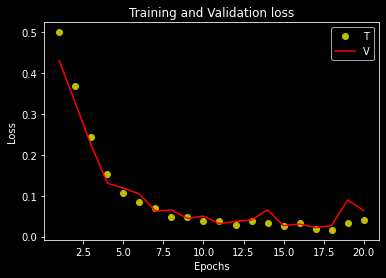

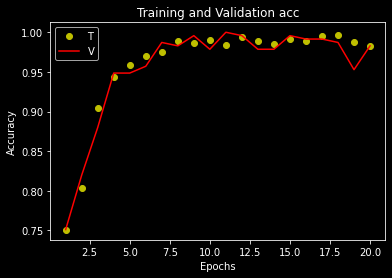

In [9]:
Main_title_loss="Training and Validation loss"
Main_title_acc = "Training and Validation acc"

draw_Training_validation_loss(history=history,title=Main_title_loss)
draw_Trainingvalidation_acc(history=history,title=Main_title_acc)

# testing model

In [ ]:
test_results = model.evaluate(X_Test_features,Y_Test_labels)
print(f'Test results - Loss: {test_results[0]*100} - Accuracy: {test_results[1]*100}%')

In [ ]:
#prediction_result = np.argmax(model.predict(X_Test_features), axis=-1)

predictedClasses = (model.predict(X_Test_features) > 0.5).astype("int32")

drawchart(Y_Test_labels,predictedClasses)

predictedValues = model.predict(X_Test_features)




createReport(predictedClasses=predictedClasses,predictedValue=predictedValues,trueValue=Y_Test_labels)


In [ ]:
y_prediction = model.predict_classes(X_Test_features)
datasettypes = ["train","test","valid","internet"]
print("The accuracy of the model with ",typeOfDataset(dataset=datasettypes[1])," is",accuracyPredrict(y_true=Y_Test_labels,y_predict=y_prediction)*100,'% ' )


In [ ]:
value=drawhistrogram(X_Test_features,Y_Test_labels)

single_prediction=model.predict(np.array([X_Test_features[value,]]))
output= model.predict_classes(np.array([X_Test_features[value,]]))




if output[0][0] == 0:
    output='NORMAL'
else:
    output='STEGGED'


probability_of_image = str(single_prediction[0][0] * 100) + "%"

print("Image is predicted as "+output+" with value "+probability_of_image+"%")




# Testing internet data

In [11]:
test_results = model.evaluate( X_LargeInternetSET_features,Y_LargeInternetSET_labels)
print(f'Test results - Loss: {test_results[0]*10} - Accuracy: {test_results[1]*100}%')

2/2 [==============================] - 0s 3ms/step - loss: 2.5258 - accuracy: 0.9394
Test results - Loss: 25.257856845855713 - Accuracy: 93.9393937587738%


# Total internet prediction

[0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>


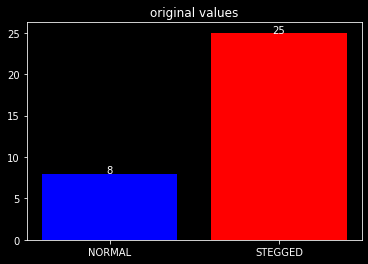

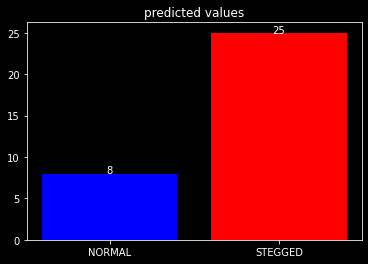


 True value of image 1 is normal predicted class is normal with value 21.682435274124146%
 True value of image 2 is stegged predicted class is stegged with value 92.9868757724762%
 True value of image 3 is stegged predicted class is stegged with value 100.0%
 True value of image 4 is stegged predicted class is stegged with value 98.5124409198761%
 True value of image 5 is stegged predicted class is stegged with value 100.0%
 True value of image 6 is stegged predicted class is stegged with value 100.0%
 True value of image 7 is normal predicted class is normal with value 0.008434688061242923%
 True value of image 8 is normal predicted class is normal with value 0.008339585474459454%
 True value of image 9 is normal predicted class is normal with value 0.004305041147745214%
 True value of image 10 is stegged predicted class is stegged with value 100.0%
 True value of image 11 is normal predicted class is normal with value 0.010952445882139727%
 True value of image 12 is stegged predicte

In [12]:

predictedClasses = (model.predict(X_LargeInternetSET_features) > 0.5).astype("int32")

drawchart(Y_LargeInternetSET_labels,predictedClasses)

predictedValues = model.predict(X_LargeInternetSET_features)




createReport(predictedClasses=predictedClasses,predictedValue=predictedValues,trueValue=Y_LargeInternetSET_labels)

# calclating accuracy of the model with Internet data

In [ ]:
y_prediction = model.predict_classes(X_InternetSET_features)
datasettypes = ["test","internet"]
print("The accuracy of the model with ",typeOfDataset(dataset=datasettypes[1])," is",accuracyPredrict(y_true=Y_InternetSET_labels,y_predict=y_prediction)*100,'% ' )

# testing single image from internet set

In [ ]:
value=drawhistrogram(X_InternetSET_features,Y_InternetSET_labels)
single_prediction=model.predict(np.array([X_InternetSET_features[value,]]))
output= model.predict_classes(np.array([X_InternetSET_features[value,]]))




if output[0][0] == 0:
    output='NORMAL'
else:
    output='STEGGED'


probability_of_image = str(single_prediction[0][0] * 100) + "%"

print("Image is predicted as "+output+" with value "+probability_of_image+"%")

# testing small set on the model

In [ ]:
#evaluating the accuracy of the model with small set data
test_results = model.evaluate(X_SmallSet_features,Y_SmallSet_labels)
print(f'Test results - Loss: {test_results[0]*100}% - Accuracy: {test_results[1]*100}%')

In [ ]:
#creating report based on prediction
predictedClasses = (model.predict(X_SmallSet_features) > 0.5).astype("int32")
drawchart(Y_SmallSet_labels,predictedClasses)
predictedValues = model.predict(X_SmallSet_features)

createReport(predictedClasses=predictedClasses,predictedValue=predictedValues,trueValue=Y_SmallSet_labels)


In [ ]:
#manually calculating accuracy

y_prediction = model.predict_classes(X_SmallSet_features)
datasettypes = ["test","internet","small"]
print("The accuracy of the model with ",typeOfDataset(dataset=datasettypes[2])," is",accuracyPredrict(y_true=Y_SmallSet_labels,y_predict=y_prediction)*100,'% ' )

In [ ]:
# single prediction check

value=drawhistrogram(X_SmallSet_features,Y_SmallSet_labels)

single_prediction=model.predict(np.array([X_SmallSet_features[value,]]))
output= model.predict_classes(np.array([X_SmallSet_features[value,]]))


print(output)

if output[0][0] == 0:
    output='NORMAL'
else:
    output='STEGGED'


probability_of_image = str(single_prediction[0][0] * 100) + "%"

print("Image is predicted as "+output+" with value "+probability_of_image)